Carregando as bibliotecas

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset fashion_mnist (disponível no keras)

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Exploração básica dos dados do dataset

In [ ]:
print(f'''Tamanho do dataset (treino): {len(imagens_treino)} 
Qtd de linhas x colunas (treino): {imagens_treino.shape} 
Qtd de linhas x colunas (teste): {imagens_teste.shape} 
Tamanho do dataset (teste) {len(imagens_teste)}
Variedade de Classes de {identificacoes_treino.min()} a {identificacoes_treino.max()}''')

Tamanho do dataset (treino): 60000 
Qtd de linhas x colunas (treino): (60000, 28, 28) 
Qtd de linhas x colunas (teste): (10000, 28, 28) 
Tamanho do dataset (teste) 10000
Variedade de Classes de 0 a 9


Exibição dos dados

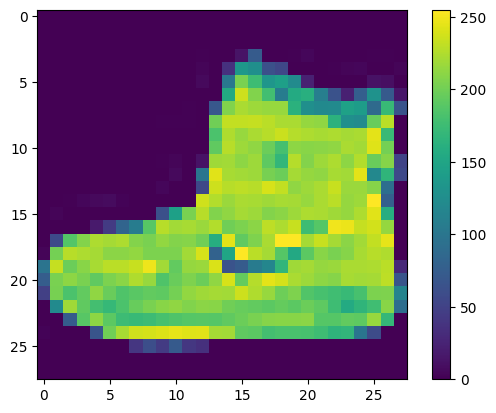

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [ ]:
#Atribui valores de pixel entre 0 e 1 para os valores que antes iam de 0 a 255
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
#criação do modelo
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

#compilação do modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Treino do modelo
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 1.1228 - accuracy: 0.6437 - val_loss: 0.7151 - val_accuracy: 0.7423
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6706 - accuracy: 0.7577 - val_loss: 0.6004 - val_accuracy: 0.7812
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5924 - accuracy: 0.7857 - val_loss: 0.5455 - val_accuracy: 0.8023
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5442 - accuracy: 0.8056 - val_loss: 0.5114 - val_accuracy: 0.8176
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5125 - accuracy: 0.8170 - val_loss: 0.4895 - val_accuracy: 0.8203


Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

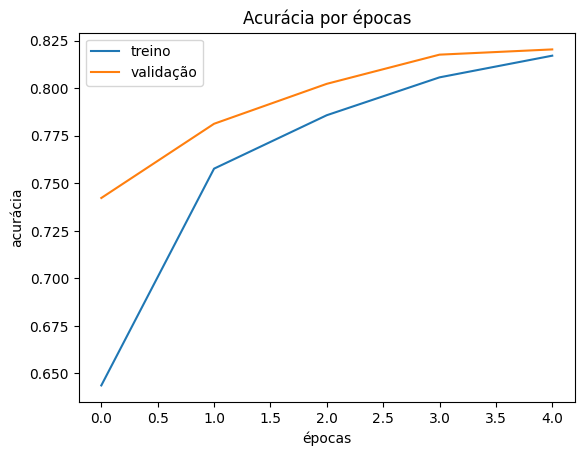

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

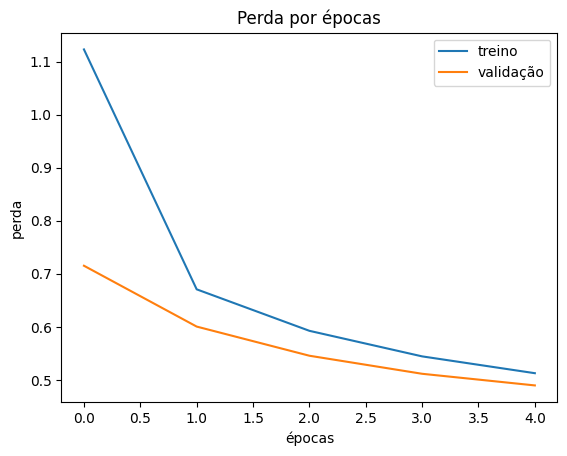

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 18488.3867 - accuracy: 0.7001
Perda do teste: 18488.38671875
Acurácia do teste: 0.7001000046730042


Neste estudo inicialmente foi testado a geração do modelo com mais épocas, no entanto constatou-se overfit do modelo. Após o ajuste da quantidade de épocas a partir do gráfico de acurácia e perdas, as métricas de treino estavam mais ajustadas as métricas de validação, mas ainda apresentavam valores superiores. Por isso, foi criada uma camada de dropout para normalização do modelo que finalmente ajustou as métricas de treino as métricas de validação, sendo estas últimas superiores as primeiras.